In [1]:
#Read in first dataset
import pandas as pd

stn_ids = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt', header=None, infer_nrows=1000)
stn_ids.columns = ['ID','LAT','LON','ELEV','UKN','NAME','GSN','WBAN']
stn_ids

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,41217.0
...,...,...,...,...,...,...,...,...
129653,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON,NaN,67969.0
129654,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO,NaN,67975.0
129655,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE,NaN,67977.0
129656,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0


In [2]:
#Read in second dataset
periods = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-inventory.txt', header=None, infer_nrows=1000)
periods.columns = ['ID','LAT','LON','ELEM','TiMIN','TiMAX']
periods

,ID,LAT,LON,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949
...,...,...,...,...,...,...
767053,ZI000067983,-20.2000,32.6160,PRCP,1951,2025
767054,ZI000067983,-20.2000,32.6160,TAVG,1962,2025
767055,ZI000067991,-22.2170,30.0000,TMAX,1951,1990
767056,ZI000067991,-22.2170,30.0000,TMIN,1951,1990


In [3]:
#Merge
merged_stns = pd.merge(stn_ids,periods,how='left',left_on='ID',right_on='ID')
merged_stns

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMAX,1949.0,1949.0
1,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMIN,1949.0,1949.0
2,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,PRCP,1949.0,1949.0
3,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNOW,1949.0,1949.0
4,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNWD,1949.0,1949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767089,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,PRCP,1951.0,2025.0
767090,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,TAVG,1962.0,2025.0
767091,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMAX,1951.0,1990.0
767092,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMIN,1951.0,1990.0


In [4]:
#Obtain ID for Central Park station
check = merged_stns[merged_stns['LAT_x'].between(40.77,40.79) & merged_stns['LON_x'].between(-74,-73.94)]
check.head()

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
762672,USW00094728,40.7789,-73.9692,42.7,NY,NY CITY CNTRL PARK,NaN,72506.0,40.7789,-73.9692,TMAX,1869.0,2025.0
762673,USW00094728,40.7789,-73.9692,42.7,NY,NY CITY CNTRL PARK,NaN,72506.0,40.7789,-73.9692,TMIN,1869.0,2025.0
762674,USW00094728,40.7789,-73.9692,42.7,NY,NY CITY CNTRL PARK,NaN,72506.0,40.7789,-73.9692,TOBS,1952.0,1952.0
762675,USW00094728,40.7789,-73.9692,42.7,NY,NY CITY CNTRL PARK,NaN,72506.0,40.7789,-73.9692,PRCP,1869.0,2025.0
762676,USW00094728,40.7789,-73.9692,42.7,NY,NY CITY CNTRL PARK,NaN,72506.0,40.7789,-73.9692,SNOW,1869.0,2025.0


In [9]:
#Download Central Park station data
central_park = pd.read_csv("s3://noaa-ghcn-pds/csv/by_station/USW00094728.csv",storage_options={"anon": True},dtype={'Q_FLAG': 'object', 'M_FLAG': 'object'},parse_dates=['DATE']).set_index('DATE')

central_park['ELEMENT'].unique()

array(['TMAX', 'TMIN', 'PRCP', 'SNOW', 'DASF', 'MDSF', 'SNWD', 'WT04',
       'WT09', 'TOBS', 'WT07', 'EVAP', 'WDMV', 'DAEV', 'MDEV', 'DAWM',
       'MDWM', 'WT03', 'WT16', 'WT18', 'WT06', 'ACMH', 'ACSH', 'PSUN',
       'TSUN', 'WDFM', 'WSFM', 'PGTM', 'WDFG', 'WSFG', 'WT05', 'WESD',
       'WDF1', 'WSF1', 'AWND', 'FMTM', 'WT14', 'WT15', 'WT17', 'WDF2',
       'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT08', 'WT19', 'WT02', 'WT13',
       'WT22', 'WT11', 'TAVG', 'WT21', 'ADPT', 'ASLP', 'ASTP', 'AWBT',
       'RHAV', 'RHMN', 'RHMX'], dtype=object)

In [10]:
#Create month/day/year columns for future merging and scale data values
central_park['month_day'] = central_park.index.strftime('%m-%d')
central_park['year'] = central_park.index.strftime('%Y')
central_park['DATA_VALUE'] = central_park['DATA_VALUE']/10
print(central_park)

                     ID ELEMENT  DATA_VALUE M_FLAG Q_FLAG S_FLAG  OBS_TIME  \
DATE                                                                         
1869-01-01  USW00094728    TMAX        -1.7    NaN    NaN      Z       NaN   
1869-01-02  USW00094728    TMAX        -2.8    NaN    NaN      Z       NaN   
1869-01-03  USW00094728    TMAX         1.7    NaN    NaN      Z       NaN   
1869-01-04  USW00094728    TMAX         2.8    NaN    NaN      Z       NaN   
1869-01-05  USW00094728    TMAX         6.1    NaN    NaN      Z       NaN   
...                 ...     ...         ...    ...    ...    ...       ...   
2025-02-02  USW00094728    WSF5        10.3    NaN    NaN      W       NaN   
2025-02-03  USW00094728    WSF5         8.5    NaN    NaN      W       NaN   
2025-02-04  USW00094728    WSF5        16.5    NaN    NaN      W       NaN   
2025-02-05  USW00094728    WSF5         9.8    NaN    NaN      W       NaN   
2025-02-01  USW00094728    WT01         0.1    NaN    NaN      W

<Axes: xlabel='month_day'>

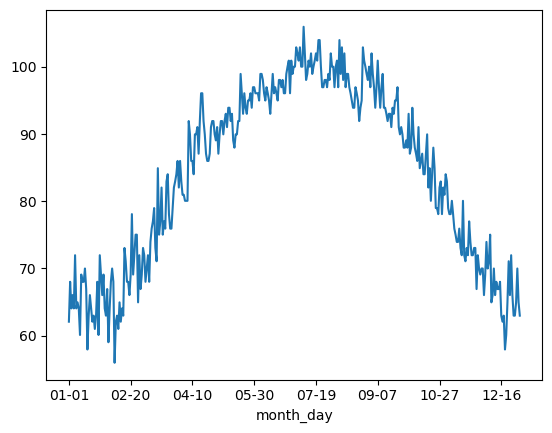

In [11]:
def create_central_park_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function a combined DataFrame with record high/low temperatures and
    1991–2020 average high/low temperatures for each calendar day.
    
    Month/Day is used to group and calculate values
 
    """
    
    # Create month/day column for later grouping
    df['month_day'] = df.index.strftime('%m-%d')
    
    # Create TMAX and TMIN dataframes
    cp_tmax = df[df['ELEMENT'] == 'TMAX'].copy()
    cp_tmin = df[df['ELEMENT'] == 'TMIN'].copy()


    # Create record highs and lows dataframes
    record_max = cp_tmax.groupby('month_day')['DATA_VALUE'].max()
    record_min = cp_tmin.groupby('month_day')['DATA_VALUE'].min()

    # Create normals dataframes
    start = '1991-01-01'
    end = '2020-12-31'
    
    norm_tmax = cp_tmax.loc[start:end]
    norm_tmin = cp_tmin.loc[start:end]

    normal_max = norm_tmax.groupby('month_day')['DATA_VALUE'].mean()
    normal_min = norm_tmin.groupby('month_day')['DATA_VALUE'].mean()

    # Combine dataframes
    combined_df = pd.DataFrame({
        'record_max_temp': record_max,
        'record_min_temp': record_min,
        'average_max_temp': normal_max,
        'average_min_temp': normal_min
    })

    return combined_df


central_park_temps = create_central_park_df(central_park)

def celsius_to_fahrenheit(c):
    return (c * 9/5) + 32
x = celsius_to_fahrenheit(central_park_temps['record_max_temp'])

x.plot()



In [15]:
#Filter for year
central_park_actuals = central_park[central_park['year']=='1998']

#Create dataframes that include actual max and min values for 1998
cp_98_max = central_park_actuals[central_park_actuals['ELEMENT']=='TMAX']
cp_98_min = central_park_actuals[central_park_actuals['ELEMENT']=='TMIN']

#Prepare columns for merge with previous dataframe
columns = ['month_day','year_x','DATA_VALUE_x','DATA_VALUE_y']
year_df = cp_98_max.merge(cp_98_min,how='left',on = 'month_day')
year_for_merge = year_df[columns]

#Merge with record data and averages
annual_data= year_for_merge.rename(columns={'year_x':'year','DATA_VALUE_x':'TMAX_Value','DATA_VALUE_y':'TMIN_Value'})
final_df = annual_data.merge(central_park_temps, how='left', on='month_day')
final_df

,month_day,year,TMAX_Value,TMIN_Value,record_max_temp,record_min_temp,average_max_temp,average_min_temp
0,01-01,1998,-1.7,-10.0,16.7,-20.0,5.806667,-1.423333
1,01-02,1998,10.6,-1.7,20.0,-16.7,5.546667,-1.653333
2,01-03,1998,15.6,7.8,17.8,-20.0,4.820000,-0.906667
3,01-04,1998,16.7,6.7,18.9,-19.4,5.800000,-1.396667
4,01-05,1998,10.0,5.6,17.8,-20.0,5.063333,-1.480000
...,...,...,...,...,...,...,...,...
360,12-27,1998,4.4,-2.2,17.2,-14.4,5.593333,-0.266667
361,12-28,1998,7.2,3.3,18.3,-13.3,6.556667,-0.173333
362,12-29,1998,4.4,2.8,21.1,-21.1,5.836667,0.063333
363,12-30,1998,3.9,-8.3,18.3,-25.0,4.996667,-0.956667


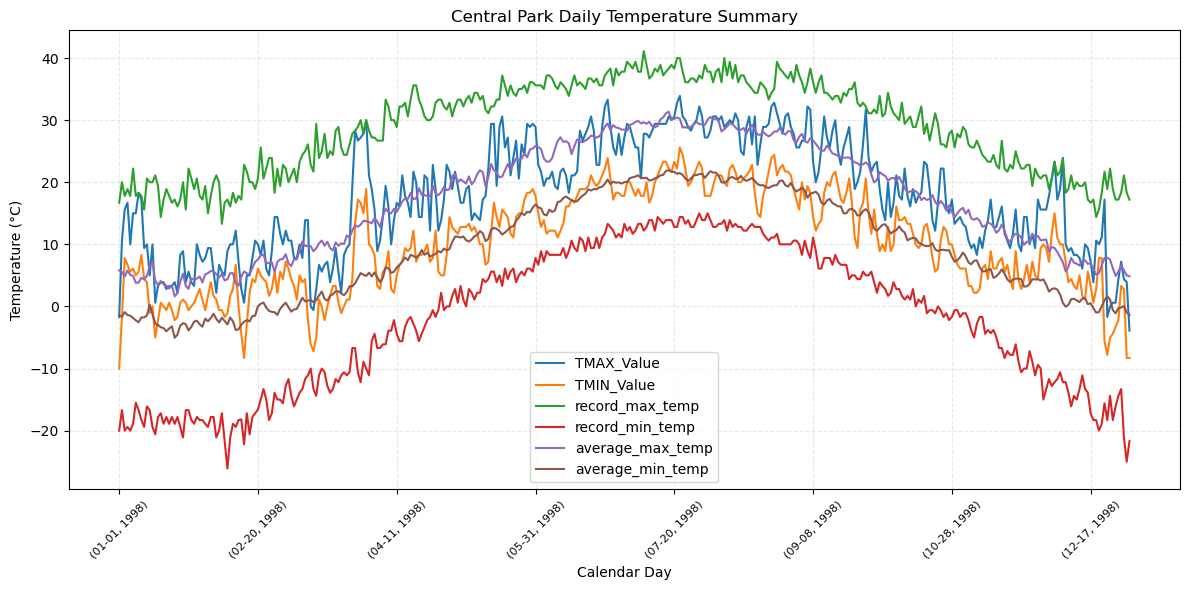

In [16]:
import matplotlib.pyplot as plt

def plot_daily_temp(df, columns=None, title="Central Park Daily Temperature Summary"):
    """
    Plot all columns of dataframe and set month/day/year to index to serve as x axis

    """
    if columns is None:
        columns = df.columns

    df[columns].plot(figsize=(12, 6), title=title)
    plt.xlabel("Calendar Day")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45, fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_daily_temp(final_df.set_index(['month_day','year']))
